<a id="top"></a>

# **5.1 Interface behavior governed by damage**

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=551838)&nbsp;part 1

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

Having described the irreversible behavior of the material using the assumption of frictional stress transfer between the material components which induces permanent **plastic** deformation, we move on to the second possibility, where we idealize the irreversible changes in the material structure as a spring break. This idealization is the basis of **damage** models.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 

**Damage functions:** We are going to define several damage functions which are used in damage models available in finite element codes. Their definition is based on an assumed profile of breakage propagation. We can use different types of damage functions that express the state of material as an amount of broken bindings/micro-springs within a unit volume of the material structure. Even though we explain them using a one-dimensional idealization of the bond behavior, it is important to note, that these functions are directly applicable in two- and three-dimensional finite element models. To document this, we demonstrate that the derived damage functions can be used to model a two-dimensional interface with slip and shear stress defined as a vector. 

**Damage evolution and energy dissipation:** From a longer perspective, we are preparing the grounds for the discussion of energy dissipation associated with irreversible changes within the material structures. Some of the damage functions presented below already employ the concept of dissipated energy within a damaged unit volume of material. They are used as precursors here to motivate the consideration of energy dissipation in the following tours.

Summarizing, in the present notebook, we are going to
* describe and visualize examples of damage functions in 1D
* show how to use an isotropic damage model to represent 
  the material behavior of a 2D interface

# **Motivation and general aspects of damage**

## Fiber bundle behavior described using a damage function

To provide a motivation for the damage based description of the material behavior let us consider micrographs of a multi-filament yarn cross section embedded in the concrete matrix. Depending on the type of the yarn, the cross section can consist of 800-50000 carbon/glass/basalt filaments  with a diameter ranging between 8-30 $\mu m$. The micrograph below presents a non-penetrated 800 [tex] yarn. The unit [tex] represents the weight in grams per one km of the yarn
\begin{align}
[\mathrm{tex}] = [\mathrm{g}/\mathrm{km}]
\end{align}
The yarns can be penetrated by a homogenizing material, most commonly epoxy resin based material.
The picture below shows two cross section of a non-penetrated glass yarn. The shapes of the cross section are circular (on the left) and flat (on the right).  

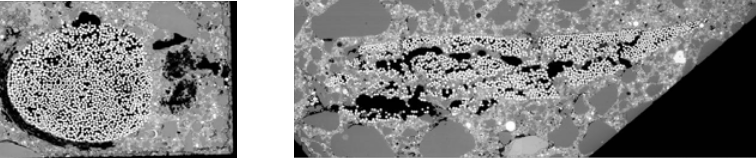

To describe the load transfer and the failure process of a yarn, the tree-dimensional representation of the structure has been reproduced using slicing technique in collaboration with IMB, ibac and GIA RWTH Aachen. The pictures show significant geometric irregularity both along the length of the yarn and in the direction of the cross-section.

![yarn3d](../fig/yarn3d.png)

The primary purpose of the reinforcement is to transfer the tensile load. Let us therefore construct an idealization which can be used to describe its tensile response as a result breakage process of the individual elastic filaments. The stress-strain curve measured in a tensile test on a yarn delivers a softening type of response. We use the example of the yarn to describe the relation between tensile stress versus strain as a filament breakage process. However, the same type of idealization applies also for the bond-slip law $\tau(s)$ that can be regarded as an irregular structure of many springs that fail in a sequence.
<a id="sig_eps_damage"></a>

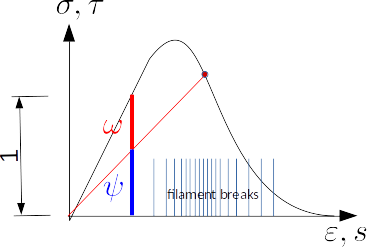

Note that the fiber bundle as a system of discrete springs can be applied both 
in tension and in shear. The damage function explained below are applicable in 
both situations. Moreover, they can be used also in two- and three dimensional
configurations as well.
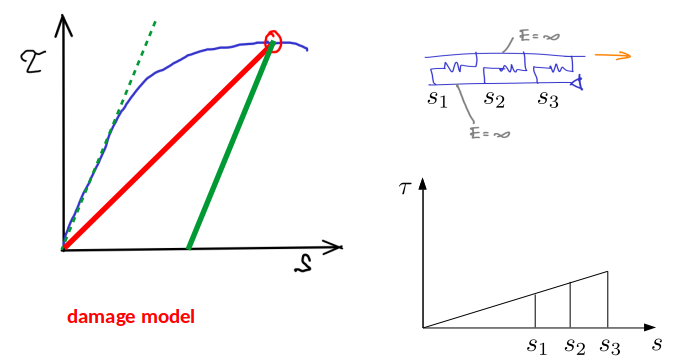

## Mathematical framework for the definition of damage models

The tensile response of a yarn can be expressed as
\begin{align}
\sigma &= \psi E_\mathrm{b} \varepsilon = (1 - \omega) E_\mathrm{b} \varepsilon
\end{align}

This expression relates the level of stress directly to the fraction of the broken filaments represented by the dimensionless damage variable 
\begin{align}
\omega \in (0,1)
\end{align}
The fraction of unbroken filaments is introduced as a degree of integrity 
\begin{align}
\psi = 1 - \omega.
\end{align}
The profile of the integrity and damage functions corresponding to the above stress-strain curve has the following shape.

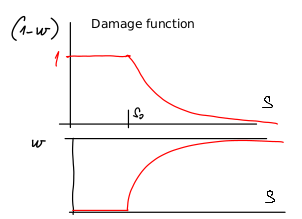

In the elastic regime with no damage, the value of $\omega$ remains zero $\omega = 0$. After the breakage of the first filament, it starts to grow up to a complete damage with $\omega = 1$. Having used the fiber bundles as a suitable picture to  motivate the damage modeling for tensile response, we will return to the bond-slip law $\tau(s)$ in the sequel with the goal to  mathematically describe the bond and pullout behavior within the damage framework. 


Instead of explicitly prescribing the nonlinear bond slip law as a nonlinear curve let us prescribe 
a nonlinear curve governing the evolution of stiffness.

<a id="damage_general"></a>
\begin{equation}
\label{EQ:bond_damage_model}
\tau = \left(1 - \omega(\kappa)\right)E_\mathrm{b} \; s
\end{equation}

where $\omega(\kappa)$ is the nonlinear damage function and $\kappa$ is the state variable
that is equivalent to maximum slip $s$ (or strain $\varepsilon$) attained during 
the loading history.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/remark.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Apparent and effective stress</b> </div> 

By rearranging the terms in the [above damage equation](#damage_general)  we can introduce the notion of effective stress as 

\begin{equation}
\tilde{\tau} = \frac{\tau}{1-\omega} = E_b \; s
\end{equation}

Note that effective stress $\tilde{\tau} \geq \tau$. While the apparent stress is related to the original material area, the effective stress is related to the undamaged material area. In other words, it can be interpreted as the stress acting on the remaining fraction of springs. The effective stress is related to the instantaneous, or still effective, cross section and not to the initial cross sectional area of the unit material zone.

## How to identify the shape of the damage function?

There are several ways how to justify a particular shape of the damage function. 
Let us distinguish three ways in which the damage functions are introduced.

 1. **Definition based on an experiment:** Given a measured $\sigma(\epsilon)$ curve, the damage level $\omega$ can be resolved directly by rearranging the [stress-strain equation](#damage_general), i.e. 
 \begin{align}
 \omega = \left(1 - \dfrac{1}{E_\mathrm{b}} \right) \dfrac{\tau}{s}
 \end{align}
 or the integrity function
 \begin{align}
 \psi = \dfrac{\tau}{E_\mathrm{b} s}
 \end{align}
 2. **Definition based on probabilistic density function of fiber strength**: Let us remark, that a the properties of a damage function as a non-decreasing function within a range (0,1) are equal to a cumulative probability density function. This fact provides the possibility to introduce the damage function as an integrated probability density function of a  filament strength within the fiber bundle model as indicated in the [stress strain response](#sig_eps_damage). 
 3. **Definition based on the amount of dissipated energy**: To narrow down the possible shapes of the damage profile, theoretical arguments based on energetic interpretation of the damage process can be used to scale the damage function to a obtain the desired amount of energy dissipation. This aspect will be addressed more in detail in Tour 6 introducing energy dissipation as an effective means of describing the localization and fracture of material exhibiting damage.

In [1]:
%matplotlib widget
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
sp.init_printing()

# **Classification of damage evolution functions** 

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=551838)&nbsp;part 2

<div style="background-color:lightgray;text-align:left"> <img src="../icons/classify.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Let us sort the damage</b> </div> 

## Linear damage function

With the image of a material structure as a fiber-bundle with linear elastic fiber response and brittle failure we can consider a case with linear distribution of fiber breaking strain. This corresponds to the case with equidistant breaking strain or slip of all springs constituting the material structure

$$\Delta s^\mathrm{break} = s_{i+1}^\mathrm{break} - s_i^\mathrm{break} = \mathrm{constant}$$

In such a case, the damage function would be a piecewise linear function with a value zero until the first fiber break $s_0$, linear profile until the last spring break $s_\mathrm{u}$ and plateau at the level 1 afterwards, i.e.
<a id='eq:linear_damage'></a>
\begin{align}
 \omega &= 
 \left\{
 \begin{array}{cl}
 0, & \kappa \leq \kappa_0 \\
 \frac{\kappa - \kappa_0}{\kappa_\mathrm{u}-\kappa_0} & \kappa_0 < \kappa \leq \kappa_\mathrm{u} \\
 1, & \mathrm{otherwise}
 \end{array}
 \right.
\end{align}

To see this type of damage function in action, let us import the prepared damage material model component `MATS1D5BondSlipD`. This model provides several damage functions in a polymorphic trait `omega_fn`. Let us select the `linear` damage function and construct an  instance of bond-slip model `bs_linear_damage`

In [2]:
from bmcs_cross_section.pullout import MATS1D5BondSlipD
bs_linear_damage = MATS1D5BondSlipD(omega_fn='linear', s_max=0.05)
bs_linear_damage.omega_fn_

The last line in the previous cell renders the symbolic definition of the linear damage function to demonstrate that it is identical with the [above specification](#eq:linear_damage). The attribute of the bond-slip model `omega_fn_` can be instantiated as any other model component to verify the shape of the damage function.

In [3]:
bs_linear_damage.omega_fn_.interact()

With the damage function at hand, let us plot the corresponding stress slip function. Let us assume that the loading is monotonically increasing so that we do not need to consider unloading 
$$ \tau = (1 - \omega(\kappa)) E_\mathrm{b}s$$
Apparently, if $\omega(\kappa)$ is linear, then $\tau$ must be quadratic. Let us verify this by rendering the material model `bs_damage_linear` 

In [4]:
bs_linear_damage.interact()

<div style="background-color:lightgray;text-align:left"> <img src="../icons/question_puzzle.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Which kind of material structure would exhibit such response?</b> </div> 

Using the fiber-bundle analogy, we can design a test which consists of a very large number of fibers 
$i \in 0 \ldots N$.

![fiber_bundle](../fig/fiber_bundle.png)

All the fibers have the same breaking strain $\bar{\varepsilon}$.
The length of the fibers follows a linear function
$$
  \ell_i = \ell_0 + i \frac{\ell_\mathrm{u} - \ell_0}{N}, \;\;\; i = 0 \ldots N
$$

Upon loading, the fibers will break at the control displacement given as
$$
 u^\mathrm{break}_i = \bar{\varepsilon} \ell_i
$$
which exhibit the property of equidistant breakage [postulated above](#equidistant_breaks)
$$\Delta u^\mathrm{break} = u_{i+1}^\mathrm{break} 
- u_i^\mathrm{break} = 
\bar{\varepsilon} \frac{\ell_\mathrm{u} - \ell_0}{N} = \mathrm{constant}$$

<div style="background-color:lightgray;text-align:left"> <img src="../icons/remark.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Can the damage function be applied also to a breaking strains within a local material structure?</b> </div> 

The fiber length distribution represent an idealization within a unit length 
of the material. Thus, given a nominal length $\ell$ of the fiber bundle, the above reasoning applies
also for strain which is related to the breaking displacement as
$$
\varepsilon^\mathrm{break}_i = \frac{u^{\mathrm{break}}_i}{\ell} 
$$
The linear damage function has been certainly used to provide a mathematical interpretation using the fiber-bundle analogy. It is certainly not applicable for real problems in the simulation of damage evolution as it occurs in a continuum. Let us therefore extend the idea to more general situations.

## Damage function as a cumulative probability density of breaking strain

The previous example has demonstrated the meaning of the damage function as a distribution of the breaking strains which has been artificially assumed linear. In fact, the linear damage function
[specified above](#eq:linear_damage) can regarded as a special type of cumulative density function. 
This brings us to the possibility to capture the breaking strain distribution using an existing 
cumulative probability density function. In particular, we choose the [Weibull distribution](https://en.wikipedia.org/wiki/Weibull_distribution). Before, explaining the reason for this choice 
let us construct another model component `bs_cdf_damage` with `omega_fn` set to `weibull-CDF`

In [5]:
bs_linear_damage = MATS1D5BondSlipD(omega_fn='weibull-CDF', s_max=0.05)
bs_linear_damage.omega_fn_

The variable $\kappa$ represents the state variable, i.e. slip or strain.
The parameters $\lambda$ and $m$ denote the so called scale and shape parameters, respectively.
Let us demonstrate their role by rendering the model component

In [6]:
bs_linear_damage.omega_fn_.interact()

By interacting with the model component we can observe that the shape parameter $m$ controls the spread of the breaks along the control slip or strain variable and scale parameter $\lambda$ shifts the breaking range horizontally. The corresponding bond slip law then has the form

In [7]:
bs_linear_damage.interact()

The qualitative shape of the displayed stress-strain curve can be conveniently used to reproduce the experimentally obtained response of a yarn observed in the tensile test.

![carbon_fiber_test](../fig/fiber_bundle_carbon_tensile_test.png)

<div style="background-color:lightgray;text-align:left"> <img src="../icons/remark.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Fiber-bundle and test length - Weibull distribution can capture it</b> </div> 

The figure shows an example of the stress-strain curves obtained experimentally in tensile tests on carbon yarns with varied test lengths reported by [Sugimoto et al. (2021)](https://link.springer.com/content/pdf/10.1557/s43578-020-00043-y.pdf). The authors use the Weibull strength distribution to interpret the and to scale the obtained fiber strength characteristics between individual yarn lengths. Since the Weibull probability distribution is based on the concept of a weakest link in a chain, it allows for a scaling of strength given a changed length. Indeed, as the figure above shows, the strength of bundles with the lengths 50, 100 and 150 exhibits a negative trend. This corresponds well with the scaling inherently present in the Weibull probability distribution. Simply speaking, the probability of failure increases with the increasing number of links within the chain. The fact that the length of 10 mm has lower strength is related to the technical difficulties involved in the testing of short yarns discussed e.g. by [Rypl et. al (2015)](../papers/yarn_tensile_test_example.pdf)

<div style="background-color:lightgray;text-align:left"> <img src="../icons/enhancement.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Generalization - exponential damage function provides flexibility</b> </div> 

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=551838)&nbsp;part 3

The probabilistic interpretation of damage evolution has shown that an exponential functions provide a flexible tool to adjust the shape of the non-linear softening branch in the stress-strain response. 
This flexibility has been exploited in many finite-element codes by providing several types of damage functions defined in terms of exponential function.

This can be documented by the fact that the function
\begin{align}
\omega(\kappa) = 1 - \exp(-\kappa)
\end{align}
approaches the value 1 for $\kappa \rightarrow \infty$. This function is usually combined with an elastic range $\kappa < \kappa_0$ where the damage is implicitly defined as zero. To demonstrate it, let us define it symbolic form using `sympy` 

In [8]:
kappa = sp.symbols('kappa')
omega_kappa_ = 1 - sp.exp(-kappa)
omega_kappa_

<div style="background-color:lightgray;text-align:left"> <img src="../icons/view.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>To see the function 'life', let us use the following code</b> </div> 

In [9]:
get_omega_kappa = sp.lambdify(kappa, omega_kappa_) # executable expression
fig, ax = plt.subplots(1,1,figsize=(7,4), tight_layout=True) # plottable area
fig.canvas.header_visible=False # hide the header
kappa_arr = np.linspace(0.0,5,100) # generate the slip array from in the range (0, 0.5)
ax.plot(kappa_arr, get_omega_kappa(kappa_arr), linestyle='solid', color='black', label=r'$\omega$')
ax.fill_between(kappa_arr, get_omega_kappa(kappa_arr), color='gray', alpha=0.2)
ax.set_ylabel(r'$\omega$'); ax.set_xlabel(r'$\kappa$');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Thus, the probability density function is only one possible form of the damage function. Let us exemplify three further types of damage function that can be encountered in the finite element codes.

<a id="exp_slope"></a>
## Damage function derived from strength and shape of softening branch

The first example shows a function which can control the slope damage evolution at the onset of damage $\kappa = \kappa_0$ by a parameter controlling its slope of the softening branch in the stress-strain diagram. It has the form
\begin{align}
\omega(\kappa) = 1 - \left[\frac{\kappa_0}{\kappa} \exp \left(- \frac{\kappa - \kappa_0}{\kappa_\mathrm{f} - \kappa_0}\right)\right]
\end{align}

In [10]:
bs_exp_slope = MATS1D5BondSlipD(omega_fn='exp-slope', s_max=0.05)
bs_exp_slope.omega_fn_.trait_set(kappa_0=0.01, kappa_f=0.04)
bs_exp_slope.omega_fn_

In [11]:
bs_exp_slope.interact()

<div style="background-color:lightgray;text-align:left"> <img src="../icons/remark.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>When to use this damage format?</b> </div> 

In contrast to the cumulative probability function, the above shown function allows for an explicit specification of strength, i.e.
$$
f_\mathrm{t} = E_\mathrm{b} \kappa_0
$$
and the brittleness controlled by the $\kappa_f$ which represents the point on the horizontal axes which is intersected by a tangent of the softening branch constructed at the onset of damage, i.e. $s = \kappa_0$. In the present case, the material strength is equivalent to the onset of inelasticity. Such coupling, however, can be too restrictive. Therefore, an example of a more flexible representation of damage is shown in the next section.

## Damage function used in Abaqus

The damage function provided in `Abaqus` uses three parameters to control the softening branch.
\begin{align}
\omega(\tilde{s}) = \frac{\kappa_0}{\kappa}\left[ 1 - \frac{1 - \exp \displaystyle\left(- \alpha
\frac{\kappa - \kappa_0}{\kappa_u - \kappa_0}\right)}{1 - \exp(-\alpha)}  \right]
\end{align}


This model is available in the catalog of damage function `omega_fn` so that we instantiate it and verify that it is equivalent to the above formula 

In [12]:
bs_exp_slope = MATS1D5BondSlipD(omega_fn='abaqus', s_max=0.05)
bs_exp_slope.omega_fn_.trait_set(kappa_0=0.01, kappa_u=0.04)
bs_exp_slope.omega_fn_

In [13]:
bs_exp_slope.interact()

Apparently, the parameter $\kappa_\mathrm{u}$ controls the point of ultimate damage at which the stress=strain curve hits the zero level. A small value of the parameter $\alpha$ renders a linear softening branch. By increasing the value of $\alpha$ a nonlinear softening with steep decay at the onset of damage is obtained.

<a id="omega_fn_G_f"></a>
## Damage function accounting for fracture energy
The last example of the damage function controls the softening branch by prescribing the area below the curve denoted as $G_\mathrm{f}$. This means, a smaller value of $G_\mathrm{f}$ makes the material more brittle, while a larger value increases the ductility
\begin{align}
\omega(\kappa) = 1 - \displaystyle{\frac{\kappa_0}{\kappa}}
\exp\left(\frac{2 E_\mathrm{b} \kappa_0 ( \kappa - \kappa_0) }
{E_\mathrm{b} \kappa^2_0 - 2 G_\mathrm{f}} 
 \right)
\end{align}

In [14]:
bs_fracture_energy = MATS1D5BondSlipD(omega_fn='fracture-energy', s_max=0.05)
bs_fracture_energy.omega_fn_.trait_set(kappa_0=0.01, G_f=1)
bs_fracture_energy.omega_fn_

Even though the expressions look different, they are equivalent. The implemented version has been rendered using the `sympy` algebra system and can be transformed in to a simpler format given above. Let us test the flexibility of the provided function.

In [15]:
bs_fracture_energy.interact()

Note that, for large values of $G_\mathrm{f}$, maximum value of stress can become larger than the stress at the onset of damage, i.e. $\tau(\kappa_0)$. Thus, in contrast to the abacus damage function, material strength is not available as a model parameter. However an algebraic rearrangement identifying the maximum stress and resolving $\kappa_0$ as a function of strength is possible.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/recall.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Keep fracture energy in mind, we will revisit it</b> </div> 

This shape of the damage function introduces physical interpretation into the control of the softening branch. As we will show in Tour 6, the area below the softening stress-strain curve represents the energy dissipated during the loading process within a unit volume of material.  

## Summary and classification of damage evolution functions

| Name | Symbol | Material parameters |
| :- | :-: | :-: | 
| linear damage | $\omega_1(\kappa)$ | $\kappa_0, \kappa_\mathrm{u}$ | 
| cumulative probability density | $\omega_2(\kappa)$ | $\lambda, m$| 
| softening slope | $\omega_3(\kappa)$ | $\kappa_0, \kappa_\mathrm{f}$ | 
| softening slope and curvature | $\omega_4(\kappa)$ | $\kappa_0, \kappa_\mathrm{u}, \alpha$ |
| fracture energy | $\omega_5(\kappa)$ | $\kappa_0, G_\mathrm{f}$ |
 

# **Sheet interface - damage in 2D**

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=551838)&nbsp;part 4

<a id="strain_norm"></a>
## Equivalent measure of strain

So far, the scalar variable $\kappa$ could be considered equivalent to the maximum slip attained during the loading history. However, it can be defined also for two and three dimensional problems. To simulate the damage in continuum
problems, an equivalent strain can be defined in terms of strain tensor invariants. To provide a simple example, 
let us consider the application of the damage framework 
for the modeling of two-dimensional interface damage.

![interface](../fig/interface_2d.png)

In this case, equivalent strain can then be defined as the distance from the undeformed configuration with zero slip $s_x, s_y = [0,0]$
\begin{align}
\kappa =  \sqrt{ s^2_x(\theta) + s_y^2(\theta) }
\end{align}

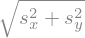

In [16]:
s_x, s_y = sp.symbols('s_x, s_y')
kappa_ = sp.sqrt( s_x**2 + s_y**2 )
kappa_

Thus, the elastic domain is represented by a circle with the radius $\kappa_0$ in $s_x$ and $s_y$ plane.

In [17]:
get_kappa = sp.lambdify( (s_x, s_y), kappa_, 'numpy' )
phi = np.linspace(0, 2*np.pi, 500)
sx, sy = np.sin(phi), np.cos(phi)
fig, ax = plt.subplots(1,1, figsize=(4,4), tight_layout=True)
fig.canvas.header_visible = False
ax.plot(sx,sy,label=r'$\kappa_0 = 1$')
ax.fill(sx,sy, color='gray', alpha=0.2)
ax.set_xlabel(r'$s_x$'); ax.set_ylabel(r'$s_y$');
ax.set_aspect('equal'); ax.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<div style="background-color:lightgray;text-align:left"> <img src="../icons/alternative.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Other examples of equivalent strain definition</b> </div> 

To show the flexibility of the the inelastic domain specification using the 
equivalent measure let us provide two more examples which are used
to define a tensile elastic limit for brittle materials.
Given a strain and stress tensors $\boldsymbol{\varepsilon}$ and $\boldsymbol{\sigma}$, 
the elastic limit can be introduced using the maximum 
principal tensile stress $\sigma_i$ and divide it by the $E$ modulus as follows.
\begin{equation}\label{eq:rankine_eq}
\kappa = \frac{1}{E} \mathrm{max}(\sigma_i), \qquad i=1,2,3  
\end{equation}
The principal stresses $\sigma_i$ are obtained as the eigenvalues of the stress tensor $\boldsymbol{\sigma}$.

Another option is to define a norm of the strain tensor expressed as follows
\begin{equation}\label{eq:mazars_eq}
\kappa = ||\langle
{\boldsymbol{\varepsilon}}
\rangle || = \sqrt{\langle \boldsymbol{\varepsilon} \rangle  : \langle \boldsymbol{\varepsilon} \rangle} = \sqrt{ {\langle \varepsilon_1\rangle}^2   + {\langle\varepsilon_2 \rangle}^2 + {\langle\varepsilon_3 \rangle}^2}
\end{equation}
In this expression, the McAuley brackets $\langle . \rangle$ means the positive part of (.), e.g. $\langle x \rangle = (x+|x|)/2$. And $\varepsilon_1, \varepsilon_2, \varepsilon_3$ are the principal strains.

## Reversibility threshold function

While plastic models introduce the definition of elastic domain by defining a threshold criterion for the values of stress variables, in damage models, the elastic domain is delimited using an equivalent strain measure $\kappa$.
\begin{align}
f := \kappa - \kappa_0 \le 0
\end{align}
This condition is also referred to as **damage initiation criterion** or loading function in the literature.

## How to treat unloading and reloading?

While in plastic model, the consistency has been used to derive the evolution equations and to distinguish unloading from loading steps, in damage models the unloading and reloading is distinguished automatically using the following criterion:
\begin{align}
\kappa(t) = \max_{\theta < t} \kappa(\theta) = \max_{\theta < t} \sqrt{ s^2_x(\theta) + s_y^2(\theta) }
\end{align}

This expression means that the equivalent strain $\kappa$ can grow only if the new value at time $t$ is larger than any other value of $\kappa$ attained during the previous time stepping $\theta < t$. 

## Constitutive law between slip and bond stress vectors

To return to the case of an interface damage, we need to relate the slip vector components to the stress vector components. 
\begin{align}
\tau_x &= (1 - \omega(\kappa)) \, E_b \, s_x \\
\tau_y &= (1 - \omega(\kappa)) \, E_b \, s_y
\end{align}

This kind of definition introduces **isotropic damage**. It uses a single damage variable for both slip directions:

> **<font color="brown"> As a consequence, damage increment caused in direction $x$ directly affects the behavior in direction $y$**
             </font>

<div style="background-color:lightgray;text-align:left"> <img src="../icons/view.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Let see how does the isotropic damage evolves in a single point</b> </div> 

To visualize the response of a material point with two control slip  vector components $s_x, s_y$ and two stress vector components $\tau_x, \tau_y$ in a 3D diagram, we will plot the loading histories in the space $\left[s_x, s_y, \sqrt{\tau_x^2 + \tau_y^2}\right]$. The vertical axis represents the norm of the stress vector. We will make use of an interactive model component `damage_2d_explorer`.

In [18]:
import damage2d_explorer as de
bs = MATS1D5BondSlipD(omega_fn='fracture-energy', s_max=0.05)
bs.omega_fn_.trait_set(G_f=10, kappa_0=0.001)
explore = de.Explore(bs=bs, s_min=-0.1, s_max=0.1)
explore.interact()

# **Characterization of damage models**

## Main properties
 * Independent definition of **elastic domain** using equivalent strain measure and **damage evolution** using damage function
 * The definitions of equivalent strain defining the inelastic domain and damage function can be arbitrarily combined
 * **Isotropic damage** - affects all loading directions equally
 * At any state in history, radial unloading returns back to origin with zero stress
 * Suitable to model brittle fracture

## Damage versus plasticity in view of algorithmic treatment

Recall that for models based on plasticity, return mapping was necessary to return back to an admissible state. 
In case of damage models, the relation between strain and stress can be introduced as an explicit function. 
This means that <font color="blue"> no return-mapping</font> is necessary. Given a strain increment, 
the corresponding stress can be directly evaluated.

## Damage versus multi-linear models in view of algorithmic treatment

Recall that the multi-linear models of the bond behavior also allowed for an explicit evaluation without return-mapping. The question might arise: What is the added value of a damage model compared to multi-linear elastic models? They both can represent the non-linear response of a monotonically loaded pullout test. The reason is twofold

 1. Damage model can distinguish unloading/reloading by remembering the measure of maximum strain $\kappa$ attained during history as demonstrated in the example below.
 2. Damage model can introduce inelasticity in 2D and 3D material models. Multilinear laws are only limited to one-dimensional model. This aspect of damage models is shown in the example of an interface damage model below.

# Open questions

 * How is the damage model embedded in a FE simulation
     * As a material subroutine returning the stress and stiffness for a given slip/strain and $\kappa_n$
 * What is the instantaneous stiffness at control time $t$? needed in FE simulation
     * Secant stiffness is available directly as $\psi E_b$
     * Consistent algorithmic stiffness can be calculated as $\left. \frac{\partial \tau}{\partial s} \right|_t$
 * Can the damage model represent cracking?
     * Yes but we need to talk about energy first


# Links to manuals of non-linear FE tools

This brief introduction of damage modeling is meant as an entry point to reading more thorough documentation, e.g. the parts of software manuals describing damage.

 - [ABAQUS Manual: available damage functions](https://classes.engineering.wustl.edu/2009/spring/mase5513/abaqus/docs/v6.5/books/usb/default.htm?startat=pt04ch11s06abm39.html)
 - [ATENA Manual: Stress-strain relations for concrete (Pages 18-21)](https://www.cervenka.cz/assets/files/atena-pdf/ATENA_Theory.pdf) 

<div style="background-color:lightgray;text-align:left"> <img src="../icons/exercise.png" alt="Run" width="50" height="50">
    &nbsp; &nbsp; <a href="../exercises/X0501 - Bond-slip law expressed as damage function.pdf"><b>Exercise X0501:</b></a> <b>Bond-slip law expressed as damage function</b> 
<a href="https://moodle.rwth-aachen.de/mod/page/view.php?id=551831"><img src="../icons/bmcs_video.png" alt="Run" height="130"></a>
</div>

<div style="background-color:lightgray;text-align:left"> <img src="../icons/exercise.png" alt="Run" width="50" height="50">
    &nbsp; &nbsp; <a href="../exercises/X0502 - Derive a bond slip law from a given damage function.pdf"><b>Exercise X0502:</b></a> <b>Bond-slip law expressed as damage function</b> 
</div>

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour4_plastic_bond/4_3_PO_trc_cfrp_cyclic.ipynb#top">4.3: Cyclic pullout of textile fabrics and CFRP sheets</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour5_damage_bond/5_2_PO_cfrp_damage.ipynb#top">5.2 Pullout behavior governed by damage</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 